## Practical 4 : Implementing word embedding using word2vec/FastText

In [1]:
from gensim.models import Word2Vec
from gensim.models import FastText
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'machine', 'learning', 'book'],
            ['one', 'more', 'new', 'book'],
         
          ['this', 'is', 'about', 'machine', 'learning', 'post'],
          ['orange', 'juice', 'is', 'the', 'liquid', 'extract', 'of', 'fruit'],
          ['orange', 'juice', 'comes', 'in', 'several', 'different', 'varieties'],
          ['this', 'is', 'the', 'last', 'machine', 'learning', 'book'],
          ['orange', 'juice', 'comes', 'in', 'several', 'different', 'packages'],
          ['orange', 'juice', 'is', 'liquid', 'extract', 'from', 'fruit', 'on', 'orange', 'tree']]

sentences_ft = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'machine', 'learning', 'book'],
            ['one', 'more', 'new', 'book']]



In [2]:
from gensim.models import FastText
model = Word2Vec(sentences, size=20, min_count=1, window=2,sg=0)
model_ft = FastText(sentences, size=10, window=5, min_count=1,workers=4,sg=1)

In [3]:
print('W2V: ' ,model['is'])
print('FT:  ',model_ft['is'])


W2V:  [-0.0179601   0.01190916 -0.0214406   0.02059648 -0.00338935 -0.01257787
  0.01937138  0.01900739  0.01506812  0.00870001 -0.01592097  0.00329741
 -0.01311773 -0.00214735  0.01494737  0.01224626  0.018218    0.01861077
 -0.00989498 -0.00268844]
FT:   [-0.00552799  0.03367986 -0.05883833 -0.00220477 -0.00529791 -0.02039591
  0.03492972 -0.02631471 -0.01446425  0.0007874 ]


<ipython-input-3-1496216620fb>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print('W2V: ' ,model['is'])
<ipython-input-3-1496216620fb>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print('FT:  ',model_ft['is'])


In [4]:
print('W2V: ',model.wv.similarity('orange','juice'))
print('FT: ',model_ft.wv.similarity('orange','juice'))

W2V:  -0.17048469
FT:  0.37623635


In [5]:
print('W2V: ',model.wv.similarity('this','orange'))

print('FT: ',model_ft.wv.similarity('this','orange'))


W2V:  -0.13297836
FT:  -0.19383095


In [6]:
print("W2V: ", model.wv.most_similar('orange')[:5])
print("FT: ", model_ft.wv.most_similar('orange')[:5])

W2V:  [('on', 0.2901984751224518), ('different', 0.2756901979446411), ('another', 0.2666744887828827), ('liquid', 0.24220576882362366), ('fruit', 0.23033246397972107)]
FT:  [('extract', 0.617983877658844), ('about', 0.4799743592739105), ('juice', 0.37623634934425354), ('comes', 0.26764047145843506), ('one', 0.24458612501621246)]


In [7]:
model.wv['maachine']
#Will generate error; Out of vocabulary word: OOV

KeyError: "word 'maachine' not in vocabulary"

In [8]:
model_ft.wv['maachine']
#FastText showing output, unlike word2vec

array([-0.01146221, -0.00701775, -0.01048237,  0.00852862, -0.00037361,
        0.00613205,  0.00666531,  0.00159444,  0.00018649, -0.01788029],
      dtype=float32)

In [9]:
close_words = model.wv.similar_by_word('orange')
close_words

[('on', 0.2901984751224518),
 ('different', 0.2756901979446411),
 ('another', 0.2666744887828827),
 ('liquid', 0.24220576882362366),
 ('fruit', 0.23033246397972107),
 ('one', 0.17062589526176453),
 ('post', 0.15735727548599243),
 ('tree', 0.153498575091362),
 ('extract', 0.10107308626174927),
 ('learning', 0.07212817668914795)]

In [10]:
close_words_ft = model_ft.wv.similar_by_word('orange')
close_words_ft

[('extract', 0.617983877658844),
 ('about', 0.4799743592739105),
 ('juice', 0.37623634934425354),
 ('comes', 0.26764047145843506),
 ('one', 0.24458612501621246),
 ('machine', 0.23994584381580353),
 ('good', 0.2246474027633667),
 ('post', 0.20221418142318726),
 ('from', 0.19821180403232574),
 ('new', 0.17364373803138733)]

In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
      wrd_vector = model.wv[wrd_score[0]]
      word_labels.append(wrd_score[0])
      arr = np.append(arr, np.array([wrd_vector]), axis=0)
      
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()


    

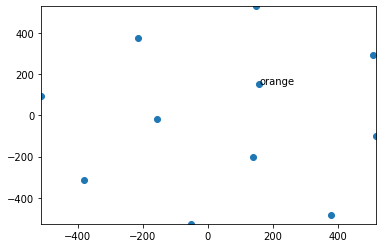

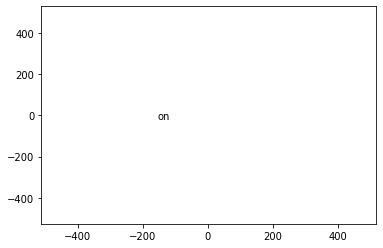

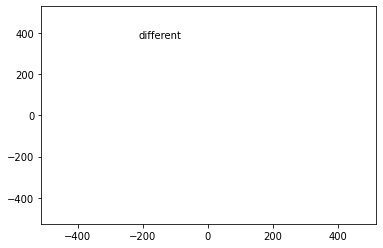

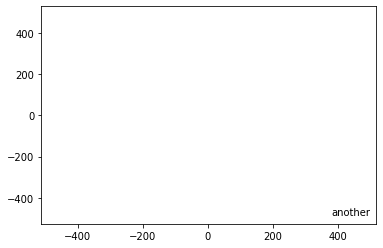

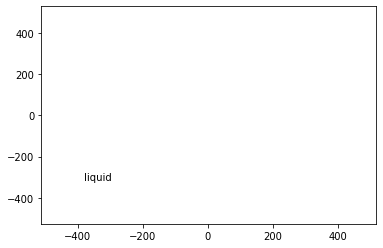

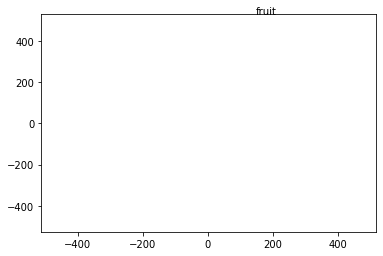

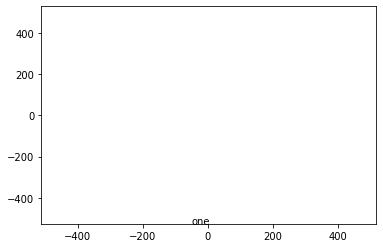

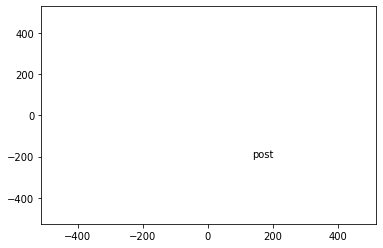

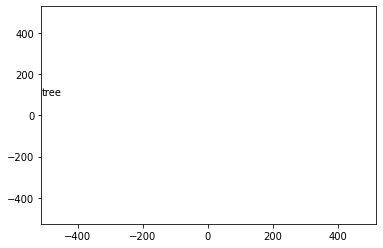

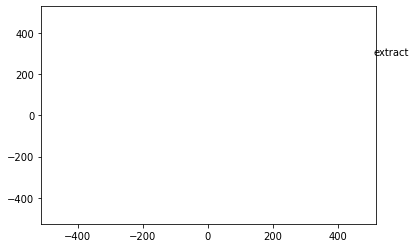

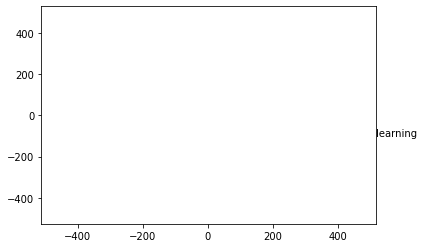

In [12]:
#for Word2Vec
display_closestwords_tsnescatterplot(model, 'orange', 20) 

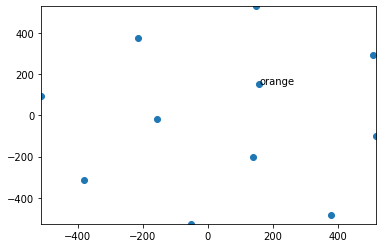

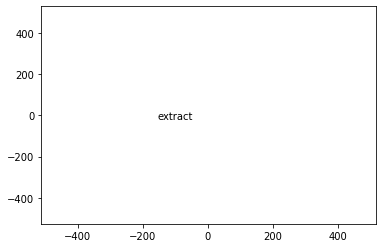

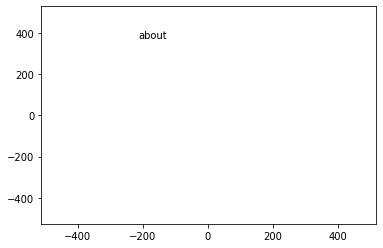

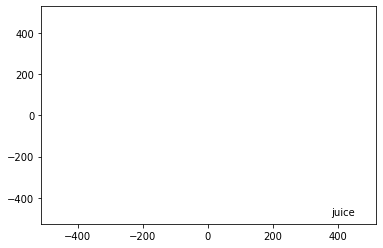

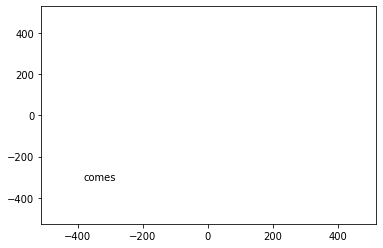

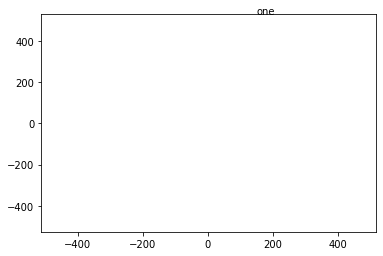

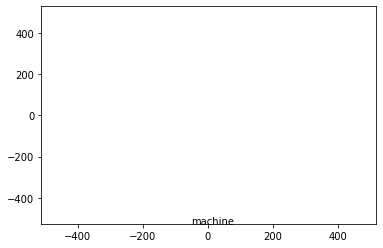

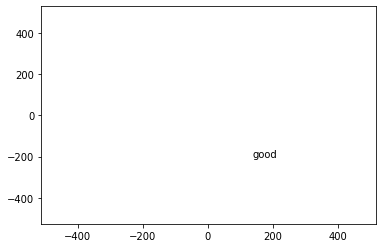

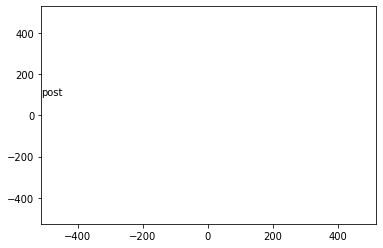

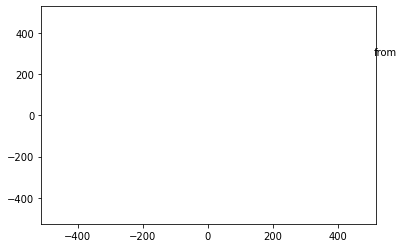

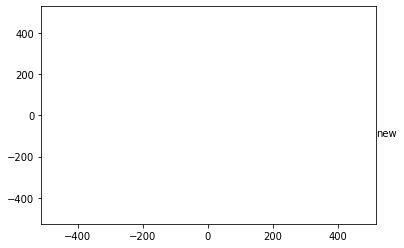

In [13]:
#for FastText
display_closestwords_tsnescatterplot(model_ft, 'orange', 10)

In [30]:
import numpy as np
 
def sent_vectorizer(sent, model):
    sent_vec = np.zeros(20)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model.wv[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))
 
V=[]
for sentence in sentences:
    V.append(sent_vectorizer(sentence, model))
    

In [32]:
def sent_vectorizer_ft(sent, model):
    sent_vec = np.zeros(10)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model.wv[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))

Ft = []
for sentence in sentences:
    Ft.append(sent_vectorizer_ft(sentence, model_ft))

In [33]:
Ft[0]


array([-0.5429004 ,  0.23807214, -0.6002917 ,  0.13657718,  0.24628471,
       -0.26469531,  0.09887034, -0.1299462 ,  0.24441731,  0.22903363])

In [34]:
V[0]

array([ 0.09683763, -0.05804521, -0.23131304, -0.09710041,  0.04220685,
        0.18498804,  0.18148404, -0.02472197,  0.20275322,  0.48047481,
       -0.36938637, -0.41515609,  0.09893282,  0.0284826 ,  0.05353488,
       -0.04807457,  0.2661568 ,  0.27193947, -0.26457129,  0.20842028])

In [35]:
V

[array([ 0.09683763, -0.05804521, -0.23131304, -0.09710041,  0.04220685,
         0.18498804,  0.18148404, -0.02472197,  0.20275322,  0.48047481,
        -0.36938637, -0.41515609,  0.09893282,  0.0284826 ,  0.05353488,
        -0.04807457,  0.2661568 ,  0.27193947, -0.26457129,  0.20842028]),
 array([ 0.05462196, -0.1914899 , -0.43428693, -0.12424376,  0.17704458,
         0.2346964 ,  0.17585565,  0.10183534,  0.04181838,  0.36795697,
        -0.20161938, -0.37725277, -0.09795741, -0.0361519 ,  0.2968588 ,
        -0.10065698,  0.20572742, -0.01513439, -0.37871921,  0.11546338]),
 array([-0.00025228,  0.17391084, -0.22339089, -0.34000868, -0.00676524,
        -0.06918398,  0.36630464, -0.07131162, -0.08505977,  0.25379313,
         0.1968204 , -0.51309952,  0.00559912,  0.20076284,  0.29636494,
        -0.04413424, -0.19246301, -0.20186212, -0.22076994, -0.17276188]),
 array([-0.06406294, -0.13139516, -0.37288753,  0.04702556, -0.16303064,
         0.05379452,  0.22767823,  0.46217665

In [36]:
Ft

[array([-0.5429004 ,  0.23807214, -0.6002917 ,  0.13657718,  0.24628471,
        -0.26469531,  0.09887034, -0.1299462 ,  0.24441731,  0.22903363]),
 array([-0.28635985,  0.10076938, -0.76030493,  0.1848497 ,  0.21813349,
        -0.25124232,  0.17123794, -0.31415261, -0.00860599,  0.23836376]),
 array([-0.37434079, -0.07224928,  0.3425173 , -0.47863582, -0.34981759,
         0.06126298, -0.31822425, -0.49979776,  0.13229013,  0.11639594]),
 array([-0.22112043,  0.3762987 , -0.4923672 ,  0.57592395,  0.04600418,
         0.17394183, -0.14864405,  0.41548679,  0.01270893,  0.09018431]),
 array([-0.28338127,  0.14887039, -0.60565637,  0.53110072, -0.37220022,
        -0.21600472,  0.15935703, -0.18624948,  0.00022643, -0.05805525]),
 array([-0.36895303, -0.53592721, -0.25437834,  0.22075489, -0.12338124,
         0.21330898, -0.01812752,  0.44354221, -0.06550538, -0.44848826]),
 array([-0.37788853,  0.11215596, -0.67873891,  0.0794985 ,  0.2221971 ,
        -0.25543924,  0.07328874, -0.39